In [ ]:
#!pip install tqdm

In [1]:
import pandas as pd
import time
from os.path import join

In [2]:
datadir = '../data/tmp/'

In [6]:
# remove all the files in the directory datadir
#!rm -rf $datadir
#!mkdir -p $datadir 

In [3]:
start_date = '2000-01-01'
nrows = 1000000

# Generate sample data
df = pd.DataFrame({'A': range(nrows), 'B': range(nrows)})
num_of_seconds = 1000000
dates = pd.date_range(start=start_date, periods=num_of_seconds, freq='S')

df['date'] = dates

df

,A,B,date
0,0,0,2000-01-01 00:00:00
1,1,1,2000-01-01 00:00:01
2,2,2,2000-01-01 00:00:02
3,3,3,2000-01-01 00:00:03
4,4,4,2000-01-01 00:00:04
...,...,...,...
999995,999995,999995,2000-01-12 13:46:35
999996,999996,999996,2000-01-12 13:46:36
999997,999997,999997,2000-01-12 13:46:37
999998,999998,999998,2000-01-12 13:46:38


In [4]:
# Write data to CSV file
start_time = time.time()
df.to_csv(join(datadir,'sample.csv') , index=False)
csv_write_time = time.time() - start_time

# Read data from CSV file
start_time = time.time()
pd.read_csv(join(datadir,'sample.csv'))
csv_read_time = time.time() - start_time

# Write data to Parquet file
start_time = time.time()
df.to_parquet(join(datadir,'sample.parquet'),  index=False)
parquet_write_time = time.time() - start_time

# Read data from Parquet file
start_time = time.time()
pd.read_parquet(join(datadir,'sample.parquet'))
parquet_read_time = time.time() - start_time


# Write a pickle file 
start_time = time.time()
df.to_pickle(join(datadir,'sample.pkl'))
pickle_write_time = time.time() - start_time

# Read a pickle file
start_time = time.time()
pd.read_pickle
pickle_read_time = time.time() - start_time


# Write a json file
start_time = time.time()
df.to_json(join(datadir,'sample.json'))
json_write_time = time.time() - start_time

# Read a json file
start_time = time.time()
pd.read_json(join(datadir,'sample.json'))
json_read_time = time.time() - start_time

# Store all the metrics in a dictionary 
metrics = {'Format': ['CSV', 'Parquet', 'Pickle', 'JSON'],
              'Write Time': [csv_write_time, parquet_write_time, pickle_write_time,json_write_time],
                'Read Time': [csv_read_time, parquet_read_time, pickle_read_time,  json_read_time]}



In [5]:
metrics = pd.DataFrame(metrics)

metrics

,Format,Write Time,Read Time
0,CSV,2.974464,0.635284
1,Parquet,0.478139,0.217663
2,Pickle,0.046496,0.000403
3,JSON,0.608292,3.155588


In [6]:
# load the csv file 
df = pd.read_csv(join(datadir,'sample.csv'))
# show the dtypes 
df.dtypes


A        int64
B        int64
date    object
dtype: object

In [7]:
# read the parquet file 
df = pd.read_parquet(join(datadir,'sample.parquet'))
# show the dtypes
df.dtypes


A                int64
B                int64
date    datetime64[ns]
dtype: object

In [8]:
# save the file as pickle 
df.to_pickle(join(datadir,'sample.pkl'))


In [9]:
# load the pickle file 
df = pd.read_pickle(join(datadir,'sample.pkl'))
# show the dtypes
df.dtypes


A                int64
B                int64
date    datetime64[ns]
dtype: object

## Errores de codificacion 

In [10]:
data = {"Name":["John Smith","Jane Doe","Andrés García"],
        "Age": [35,28,42],
        "City":["New York","Los Angeles","São Paulo"]}
df = pd.DataFrame(data)
df.to_csv(join(datadir,"enc_data.csv") , index=False)

In [11]:
# load the encoded file
df = pd.read_csv(join(datadir,"enc_data.csv"),encoding='ascii')
df

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 65: ordinal not in range(128)

In [6]:
# compare the write and read times for parquet and csv for different number of rows and columns 
import pandas as pd
import time
from os.path import join
import numpy as np 
from tqdm import tqdm

datadir = '../data/tmp/'

rows_list = [1000, 10000, 10000,100000,1000000]
cols_list = [10]


# create a dictionary to store the metrics
metrics = {'nrows': [],
            'ncols': [],
            'Write Time CSV': [],
            'Read Time CSV': [],
            'Write Time Parquet': [],
            'Read Time Parquet': []}

# loop over the number of rows and columns
# show the loop progress using tqdm 
for  nrows in tqdm(rows_list):
    for ncols in cols_list:
        # create a numpy matrix with nrows and ncols 
        data = np.random.rand(nrows, ncols)
        # create a dataframe with the data
        df = pd.DataFrame(data)
        df.columns = df.columns.astype(str) 

        # write the data to a csv file
        start_time = time.time()
        df.to_csv(join(datadir,'sample.csv') , index=False)
        csv_write_time = time.time() - start_time
        # read the data from the csv file
        start_time = time.time()
        pd.read_csv(join(datadir,'sample.csv'))
        csv_read_time = time.time() - start_time
        # write the data to a parquet file
        start_time = time.time()
        df.to_parquet(join(datadir,'sample.parquet'),  index=False)
        parquet_write_time = time.time() - start_time
        # read the data from the parquet file
        start_time = time.time()
        pd.read_parquet(join(datadir,'sample.parquet'))
        parquet_read_time = time.time() - start_time
        # store the metrics in the dictionary
        metrics['nrows'].append(nrows)
        metrics['ncols'].append(ncols)
        metrics['Write Time CSV'].append(csv_write_time)
        metrics['Read Time CSV'].append(csv_read_time)
        metrics['Write Time Parquet' ].append(parquet_write_time)
        metrics['Read Time Parquet'].append(parquet_read_time)




100%|██████████| 5/5 [00:17<00:00,  3.56s/it]


In [7]:
metrics =  pd.DataFrame(metrics)



In [8]:
metrics

# calculate the ratio of read and write times for csv and parquet 
metrics['Write Time CSV/Parquet'] = metrics['Write Time CSV']/metrics['Write Time Parquet']
metrics['Read Time CSV/Parquet'] = metrics['Read Time CSV']/metrics['Read Time Parquet']
# calculate the number of elements in the dataframe 
metrics['n_elements'] = metrics['nrows']*metrics['ncols'] 
metrics

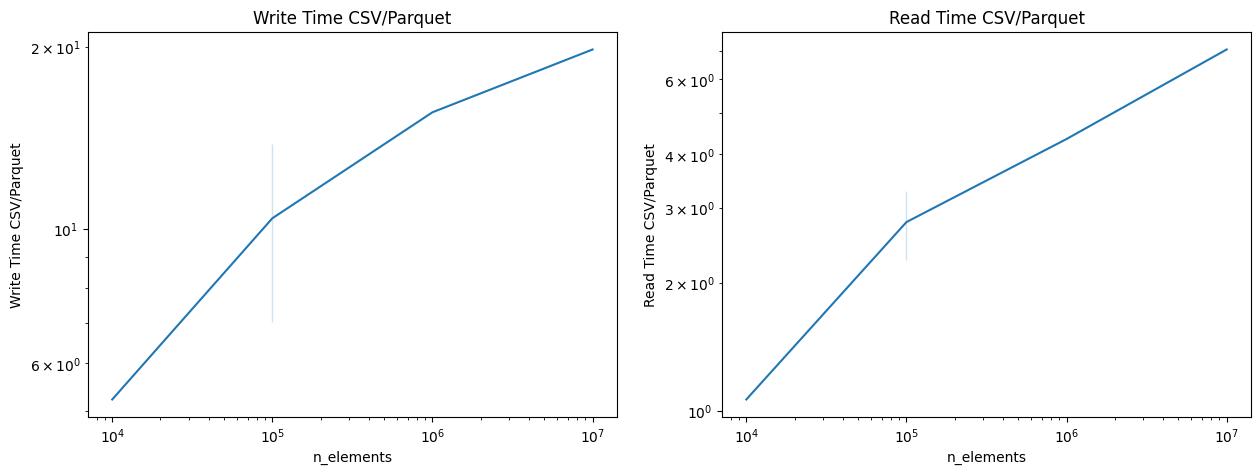

In [9]:
metrics

# plot the ratio of read and write times for csv and parquet in log scale 
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(x='n_elements', y='Write Time CSV/Parquet', data=metrics, ax=ax[0])
sns.lineplot(x='n_elements', y='Read Time CSV/Parquet', data=metrics, ax=ax[1])
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_title('Write Time CSV/Parquet')
ax[1].set_title('Read Time CSV/Parquet')
plt.show()


## API 

In [ ]:
import requests

word = "example"
url = f"https://api.dictionaryapi.dev/api/v2/entries/en/{word}"
response = requests.get(url)

response.text

In [ ]:
data = response.json()
data